Enter Q matrix:
Enter rows one by one, comma-separated. Type 'end' when done:


 4,2
 2,2
 end


Enter vector b (comma-separated):


 -1,1


Enter initial guess x0 (comma-separated):


 0,0



Optimal point x*:
[-1.   1.5]

Minimum value of f(x):
-1.25


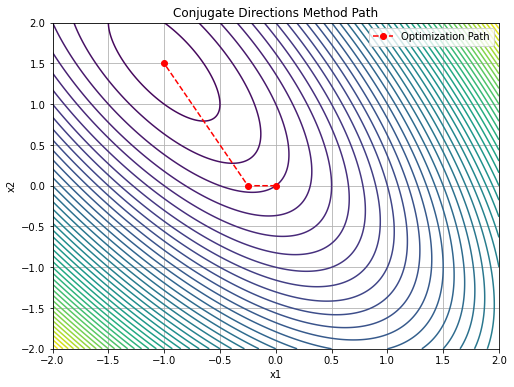

In [1]:
import numpy as np

def f(x, Q, b):
    return 0.5 * x.T @ Q @ x - b.T @ x

def conjugate_directions(Q, b, x0, tol=1e-6):
    n = len(x0)
    x = x0.copy()
    D = np.eye(n)  # Initial directions (standard basis)
    path = [x.copy()]

    # Generate Q-conjugate directions using Gram-Schmidt
    for i in range(n):
        for j in range(i):
            proj = (D[:, j].T @ Q @ D[:, i]) / (D[:, j].T @ Q @ D[:, j])
            D[:, i] -= proj * D[:, j]

    # Normalize directions (optional)
    for i in range(n):
        norm = np.linalg.norm(D[:, i])
        if norm != 0:
            D[:, i] /= norm

    for i in range(n):
        d = D[:, i]
        alpha = (b.T @ d - x.T @ Q @ d) / (d.T @ Q @ d)
        x = x + alpha * d
        path.append(x.copy())

    return x, path

def parse_matrix_input(prompt):
    print(prompt)
    print("Enter rows one by one, comma-separated. Type 'end' when done:")
    rows = []
    while True:
        line = input()
        if line.lower() == 'end':
            break
        rows.append(list(map(float, line.strip().split(','))))
    return np.array(rows, dtype=float)

def main():
    # Input Q matrix
    Q = parse_matrix_input("Enter Q matrix:")

    # Input b vector
    print("Enter vector b (comma-separated):")
    b = np.array(list(map(float, input().strip().split(','))), dtype=float)

    # Input x0 vector
    print("Enter initial guess x0 (comma-separated):")
    x0 = np.array(list(map(float, input().strip().split(','))), dtype=float)

    # Check dimensions
    if Q.shape[0] != Q.shape[1]:
        print("Error: Q must be a square matrix.")
        return
    if Q.shape[0] != len(b) or len(b) != len(x0):
        print("Error: Dimensions of Q, b, and x0 must match.")
        return

    # Run optimization
    x_opt, path = conjugate_directions(Q, b, x0)

    print("\nOptimal point x*:")
    print(x_opt)
    print("\nMinimum value of f(x):")
    print(f(x_opt, Q, b))

    # Plot if 2D
    if len(x0) == 2:
        import matplotlib.pyplot as plt
        path = np.array(path)
        X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
        Z = 0.5*(Q[0,0]*X**2 + 2*Q[0,1]*X*Y + Q[1,1]*Y**2) - b[0]*X - b[1]*Y

        plt.figure(figsize=(8,6))
        plt.contour(X, Y, Z, levels=50)
        plt.plot(path[:, 0], path[:, 1], 'ro--', label='Optimization Path')
        plt.title('Conjugate Directions Method Path')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    main()
